In [1]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)

Loading required package: spatstat
Loading required package: spatstat.data
Loading required package: nlme
Loading required package: rpart

spatstat 1.58-2       (nickname: ‘Not Even Wrong’) 
For an introduction to spatstat, type ‘beginner’ 

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [2]:
file = "../../../../../../dataframes/enoe/SDEMT/df_09_transform.csv"


In [3]:
df <- read.csv(file = file)
data <- df
head(data)

est,t_loc,sex,eda,nac_dia,nac_mes,nac_anio,l_nac_c,cs_p13_1,cs_p13_2,⋯,ing_x_hrs,cp_anoc,imssissste,p14apoyos,scian,emp_ppal,tue_ppal,mh_fil2,mh_col,sec_ins
0.9855072,0.8405797,0.5362319,0.6983141,0.1159420,0.8405797,0.1594203,0.8985507,0.9275362,0.826087,⋯,0.4181089,0.9855072,0.7681159,0.9275362,0.9275362,0.7681159,0.8550725,0.8985507,0.884058,0.942029
0.8695652,0.8405797,0.5362319,0.6799321,0.1159420,0.2173913,0.1014493,0.8985507,0.9275362,0.826087,⋯,0.5097726,0.9855072,0.7681159,0.9275362,0.9275362,0.7681159,0.8550725,0.8985507,0.884058,0.942029
0.9855072,0.8405797,0.5362319,0.5769558,0.1159420,0.2173913,0.5942029,0.8985507,0.8115942,0.826087,⋯,0.4350734,0.9855072,0.7681159,0.9275362,0.9275362,0.7681159,0.8550725,0.8985507,0.884058,0.942029
0.8695652,0.9275362,0.5362319,0.5786007,0.9710145,0.6231884,0.2028986,0.8985507,0.8115942,0.826087,⋯,0.4714502,0.9855072,0.7681159,0.9275362,0.9275362,0.7681159,0.8550725,0.8985507,0.884058,0.942029
0.8695652,0.8405797,0.5362319,0.6431648,0.2898551,0.2173913,0.4202899,0.8985507,0.9855072,0.826087,⋯,0.2361188,0.9855072,0.7681159,0.9275362,0.9275362,0.7681159,0.8550725,0.8985507,0.884058,0.942029
0.9855072,0.8405797,0.5362319,0.7319174,0.2173913,0.2173913,0.7391304,0.8985507,0.9275362,0.826087,⋯,0.2639982,0.9855072,0.7681159,0.9275362,0.9275362,0.7681159,0.8550725,0.8985507,0.884058,0.942029


In [4]:
ncol(data)

[1] 51

In [5]:
data_names <- c()
data_entropy <- c()

for (column in 1:ncol(data)) {
#    print(names(data[column]))
    entropy <- SpatEntropy::shannonX(data = matrix(data[column]))
  
  data_names <- append(x = data_names, values = names(data[column]))
  data_entropy <- append(x = data_entropy, values = entropy$shannon)
}

In [6]:
df_entropy <- cbind(data.frame(data_names, data_entropy)) 
head(df_entropy)

data_names,data_entropy
est,0.4327122
t_loc,1.0290325
sex,0.6905194
eda,4.2341065
nac_dia,3.0709207
nac_mes,2.3354869


In [7]:
order_df_entropy <- df_entropy[order(df_entropy$data_entropy, decreasing = T), ]
head(order_df_entropy)

,data_names,data_entropy
4,eda,4.234107
40,hrsocup,4.234107
41,ingocup,4.234107
39,anios_esc,4.214015
42,ing_x_hrs,4.214015
7,nac_anio,3.488915


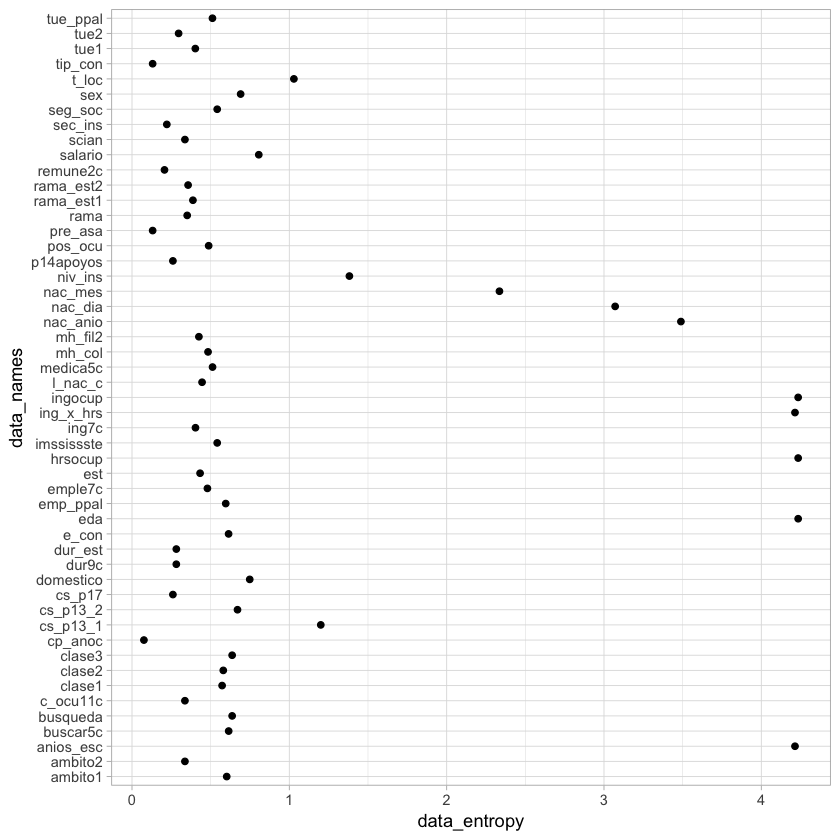

In [8]:
ggplot(df_entropy, 
       aes(y=data_names, x=data_entropy)) + geom_point() + theme_light()

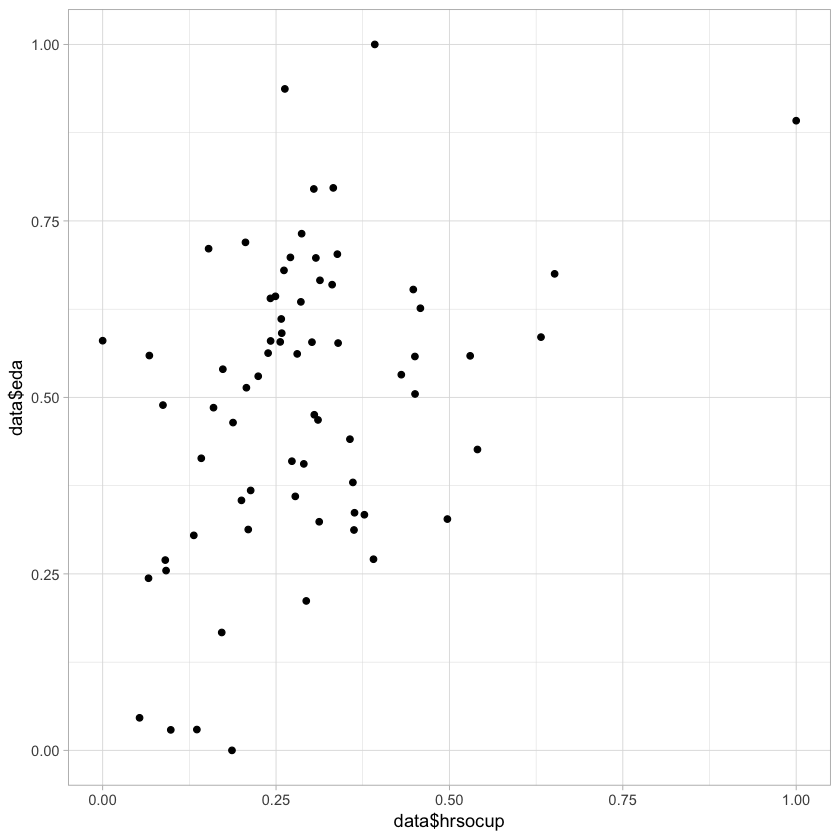

In [9]:
ggplot(data = data, 
       aes(y=data$eda, 
           x=data$hrsocup)) + geom_point() + theme_light()


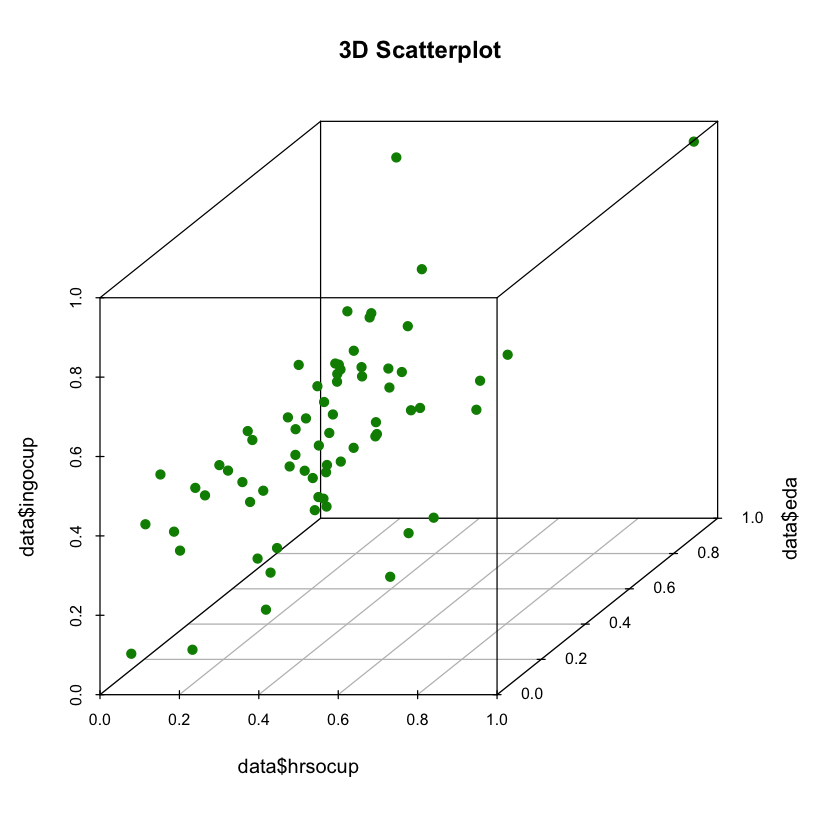

In [10]:
scatterplot3d(y=data$eda, 
              x=data$hrsocup,
              z=data$ingocup, pch = 19, color = "green4", main="3D Scatterplot")


In [13]:
file = "../../../../../dataframes/enoe/SDEMT/df_09_entropy_transform.csv"


In [14]:
write.csv(order_df_entropy, 
          file = file,
          row.names=FALSE)
